## Load datasets

SUMMARY OF CHANGES FROM V1
- XGBoost Implemented
- Train-Test Split Introduced (Could use CV K-fold to decide optimal split in future)
- Feature Importance & Decision Tree Plots

In [83]:
import pandas as pd
import sklearn as sk
import plotly as pl
import matplotlib
import matplotlib.pyplot as plt
import math
import patsy as patsy
import pickle
import statsmodels.api as sm
import numpy as np 
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import functions as f ## imports all the functions that are in a separate file to keep this file cleaner

dftrain = pd.read_csv("/Users/andrewtobin/College/final_year/FYP/House_pricing_dataset-master/dataset_csv/train.csv",index_col='ad_id')
dftest  = pd.read_csv( "/Users/andrewtobin/College/final_year/FYP/House_pricing_dataset-master/dataset_csv/test.csv",index_col='ad_id')

## Data Cleaning and Prep

In [84]:
dftrain = f.prep_data(dftrain) ## prepping the data (drops any unneccessary columns, and cleans any messy data)

In [85]:
dftrain = f.remove_outliers(dftrain) ## removing any outliers from the data

In [86]:
dftrain = f.get_dummies(dftrain) ## converts categorical data to dummy matrices and merges with our dataset

In [87]:
## splitting the training dataset into a train and validation set
train, test = train_test_split(dftrain, test_size=0.2)

In [88]:
print('Training Data Rows and Columns:',train.shape)
print('Testing Data Rows and Columns:',test.shape)

Training Data Rows and Columns: (1988, 187)
Testing Data Rows and Columns: (497, 187)


In [89]:
## defining the inputs and targets for training and testing
X_train = train.drop(['price', 'log_price'], axis=1)
Y_train = train['log_price']

X_test = test.drop(['price', 'log_price'], axis=1)
Y_test = test['log_price']

## Train Model

In [90]:
## defining values for the hyper-parameters, these will be hyper-tuned in v3
params = {
            'n_estimators': 1000,
            'max_depth': 6,
            'eta': 0.5,
            'subsample': 0.7,
            'colsample_bytree':0.7
         }

model = xgb.XGBRegressor(**params)
model=model.fit(X_train,Y_train, eval_set = [(X_train, Y_train),(X_test, Y_test)],
                                early_stopping_rounds = 10, verbose=0)

## Test Model

In [91]:
# predictions for training data (XGBOOST)
f.make_predictions(train, X_train, model)
f.make_predictions(test, X_test, model)

### to compare with V1 OLS Regression run these cells

In [44]:
## creates a regular regression model
reg = LinearRegression().fit(X_train, Y_train)

In [49]:
# predictions for training data (OLS Regression)
f.make_predictions(train, X_train, reg)
f.make_predictions(test, X_test, reg)

In [ ]:
## Accuracy Measures for Train and Testing Data (OLS Regression)
print('Training MdAPE: ', f.MdAPE(train['price'], train['predicted_price']), '%')
print('Training MAPE: ', f.MAPE(train['price'], train['predicted_price']), '%')

print('Testing MdAPE: ', f.MdAPE(test['price'], test['predicted_price']), '%')
print('Testing MAPE: ', f.MAPE(test['price'], test['predicted_price']), '%')

### Compute MdAPE: Median absolute percentage error (less sensitive to outliers than MAPE)

In [92]:
## Accuracy Measures for Train and Testing Data
print('Training MdAPE: ', f.MdAPE(train['price'], train['predicted_price']), '%')
print('Training MAPE: ', f.MAPE(train['price'], train['predicted_price']), '%')

print('Testing MdAPE: ', f.MdAPE(test['price'], test['predicted_price']), '%')
print('Testing MAPE: ', f.MAPE(test['price'], test['predicted_price']), '%')

Training MdAPE:  6.29 %
Training MAPE:  8.03 %
Testing MdAPE:  10.12 %
Testing MAPE:  14.06 %


## Some insights into the XGBoost Model (Feature Importance & Decision Tree)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

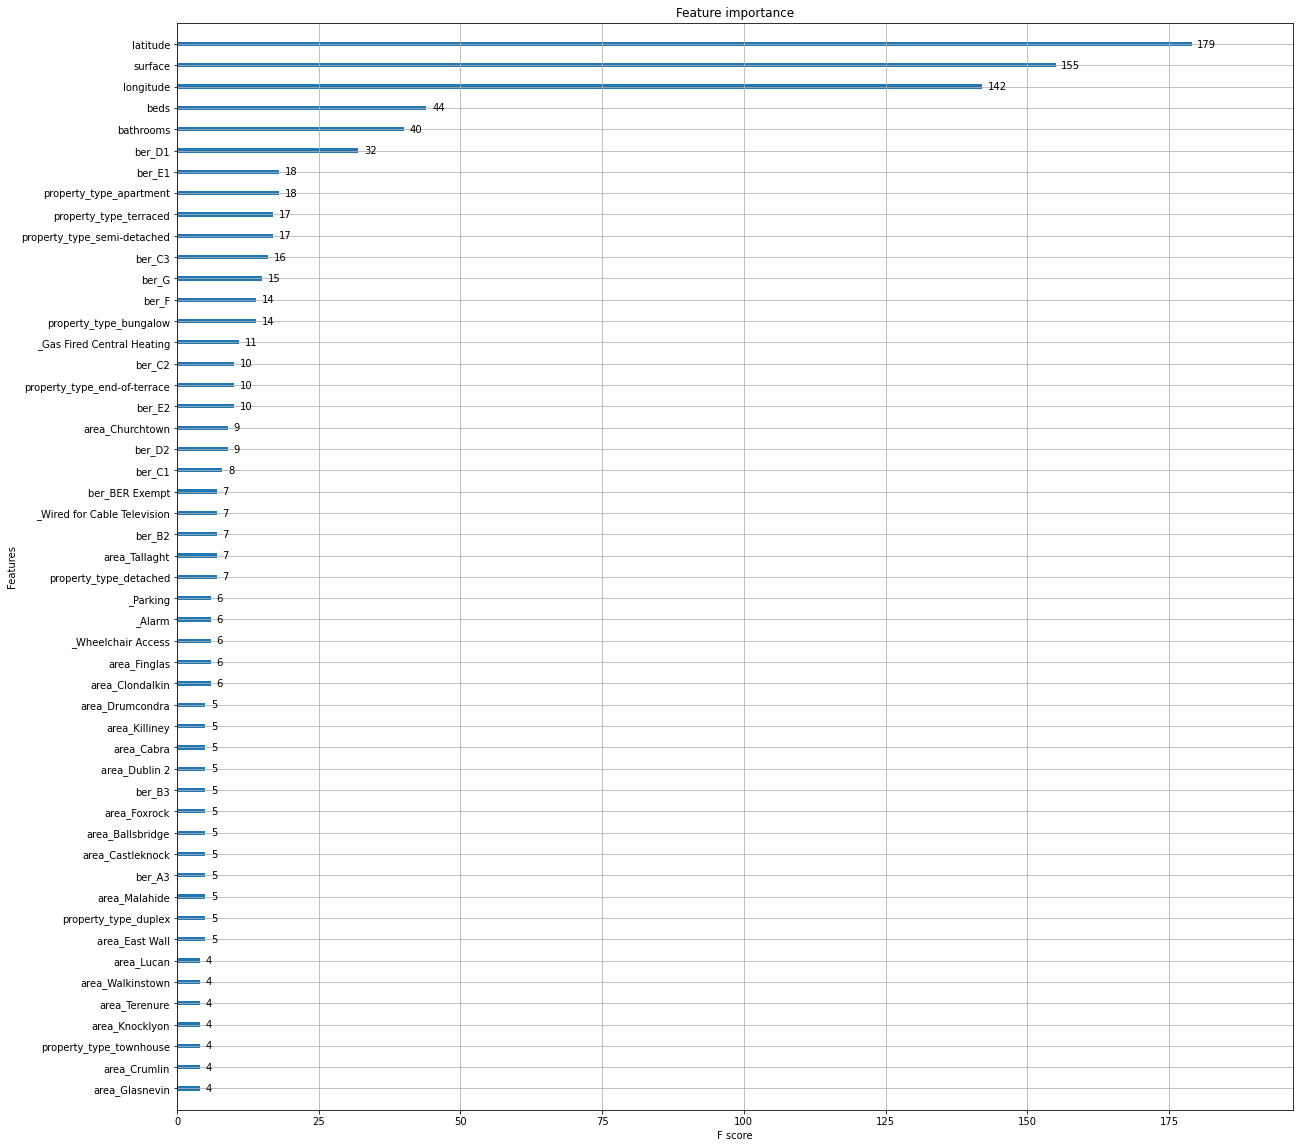

In [93]:
## plotting feature importance
fig, ax = plt.subplots(1,1,figsize=(20,20))
xgb.plot_importance(model, max_num_features=50,ax=ax)

<AxesSubplot:>

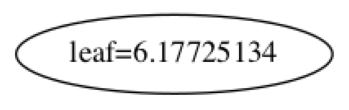

In [94]:
xgb.plot_tree(model)